In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/SANJAY/Desktop/ExcelR/Assignments/Assignment - 15/Random Forest/Fraud_check.csv")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
df.shape

(600, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
df.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

<AxesSubplot:>

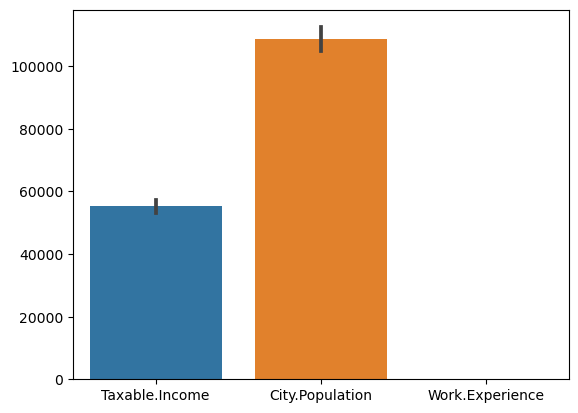

In [6]:
sns.barplot(data=df)

In [7]:
# label encoding
label_encoder = LabelEncoder()
df['Undergrad'] = label_encoder.fit_transform(df['Undergrad'])
df['Marital.Status'] = label_encoder.fit_transform(df['Marital.Status'])
df['Urban'] = label_encoder.fit_transform(df['Taxable.Income'])
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,387
1,1,0,33700,134075,18,163
2,0,1,36925,160205,30,186
3,1,2,50190,193264,15,272
4,0,1,81002,27533,28,468


In [8]:
df.describe()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.520000,1.046667,55208.375000,108747.368333,15.558333,299.053333
std,0.500017,0.821958,26204.827597,49850.075134,8.842147,172.921100
min,0.000000,0.000000,10003.000000,25779.000000,0.000000,0.000000
25%,0.000000,0.000000,32871.500000,66966.750000,8.000000,149.750000
50%,1.000000,1.000000,55074.500000,106493.500000,15.000000,299.500000
75%,1.000000,2.000000,78611.750000,150114.250000,24.000000,448.250000
max,1.000000,2.000000,99619.000000,199778.000000,30.000000,598.000000


In [9]:
# Converting the Taxable.Income column into categorical based on the taxable_income if <= 30000 as "Risky" and others are "Good"
TI_cat = []
for value in df['Taxable.Income']:
    if value <= 30000:
        TI_cat.append('Risky')
    else:
        TI_cat.append('Good')
df['TI_cat'] = TI_cat
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,TI_cat
0,0,2,68833,50047,10,387,Good
1,1,0,33700,134075,18,163,Good
2,0,1,36925,160205,30,186,Good
3,1,2,50190,193264,15,272,Good
4,0,1,81002,27533,28,468,Good


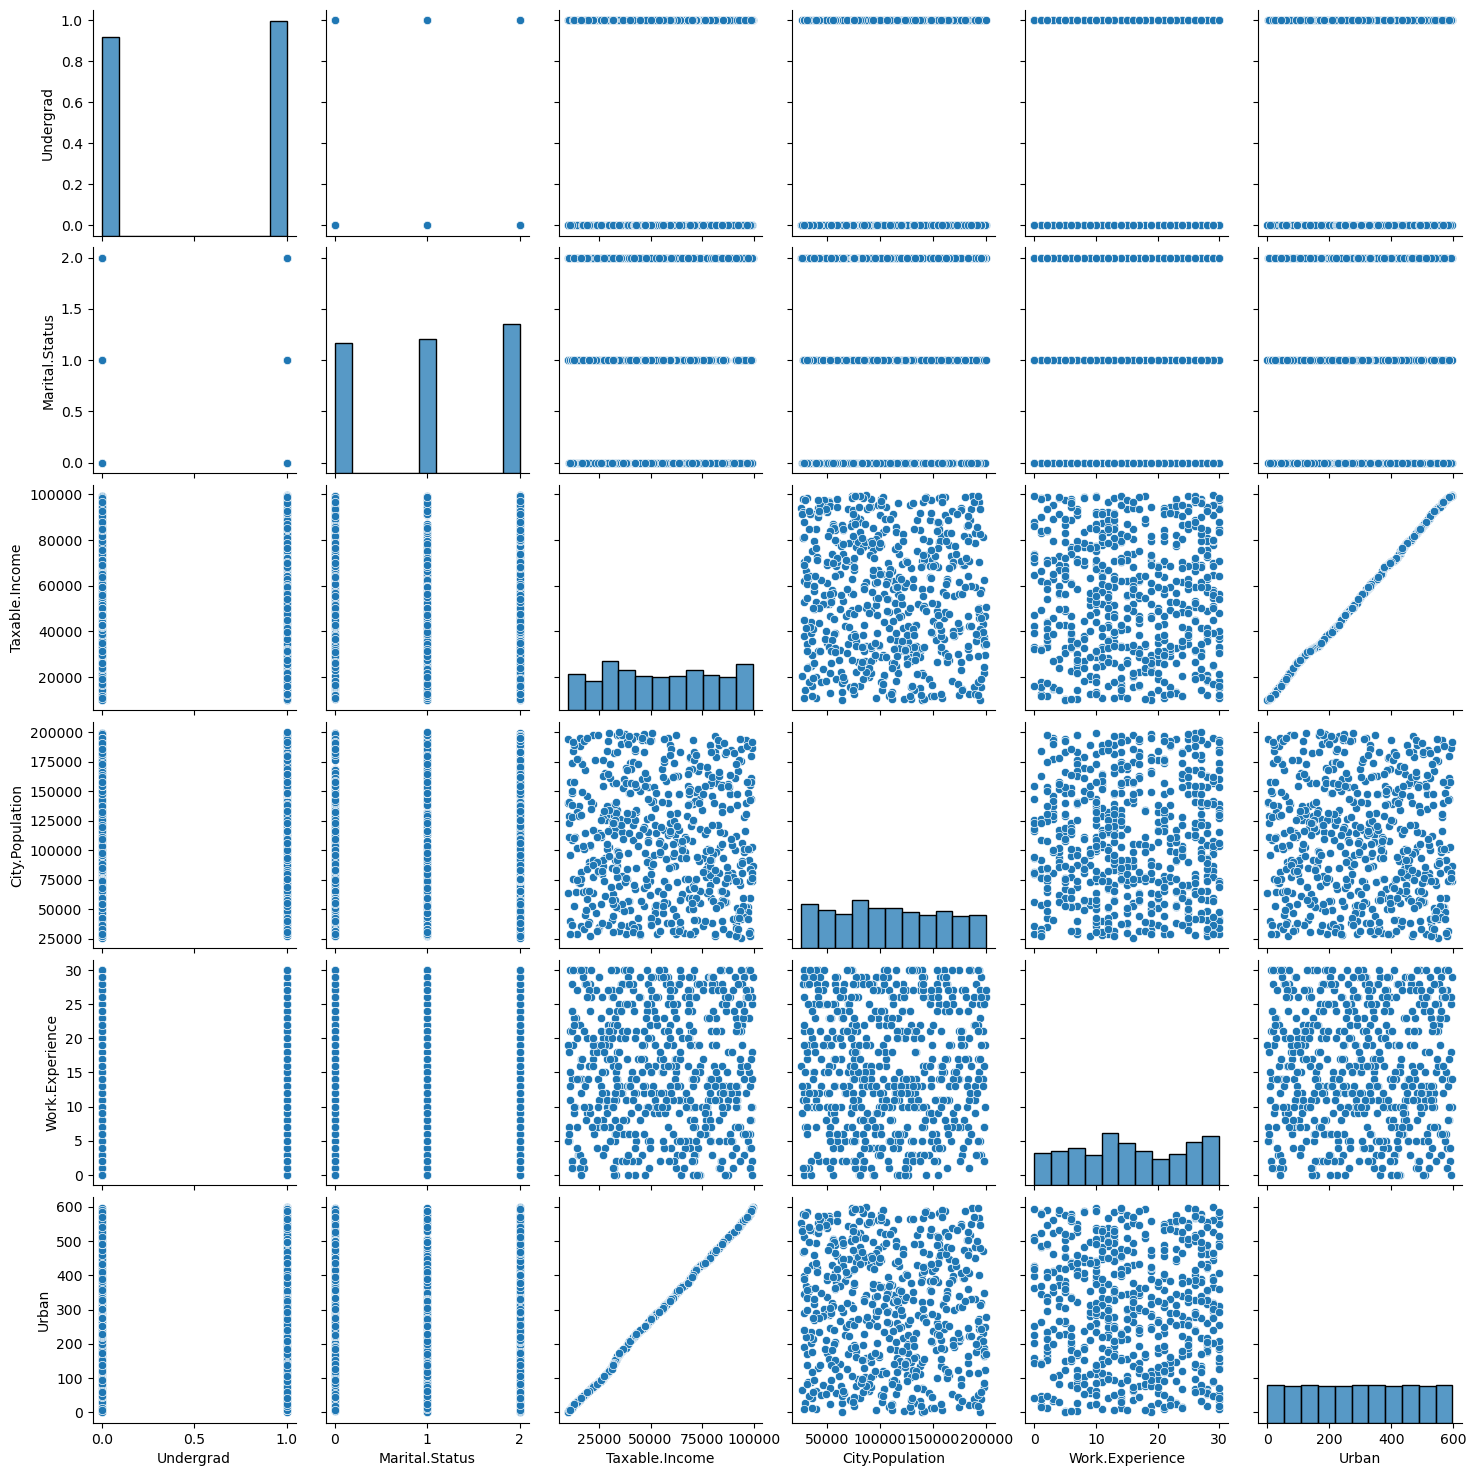

In [10]:
sns.pairplot(df)

In [11]:
df.corr()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
Undergrad,1.000000,0.042407,-0.049232,0.079579,-0.005362,-0.047935
Marital.Status,0.042407,1.000000,-0.012944,-0.001564,-0.002213,-0.011223
Taxable.Income,-0.049232,-0.012944,1.000000,-0.064387,-0.001818,0.999496
City.Population,0.079579,-0.001564,-0.064387,1.000000,0.013135,-0.062317
Work.Experience,-0.005362,-0.002213,-0.001818,0.013135,1.000000,-0.002647
Urban,-0.047935,-0.011223,0.999496,-0.062317,-0.002647,1.000000


<AxesSubplot:>

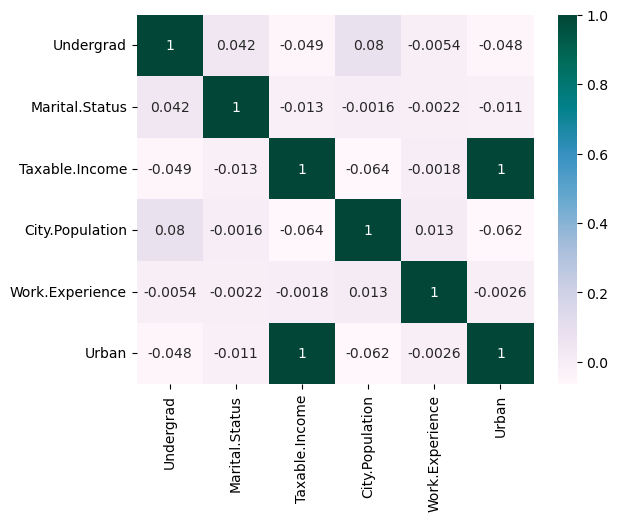

In [12]:
sns.heatmap(df.corr(),annot=True,cmap='PuBuGn')

array([[<AxesSubplot:title={'center':'Undergrad'}>,
        <AxesSubplot:title={'center':'Marital.Status'}>],
       [<AxesSubplot:title={'center':'Taxable.Income'}>,
        <AxesSubplot:title={'center':'City.Population'}>],
       [<AxesSubplot:title={'center':'Work.Experience'}>,
        <AxesSubplot:title={'center':'Urban'}>]], dtype=object)

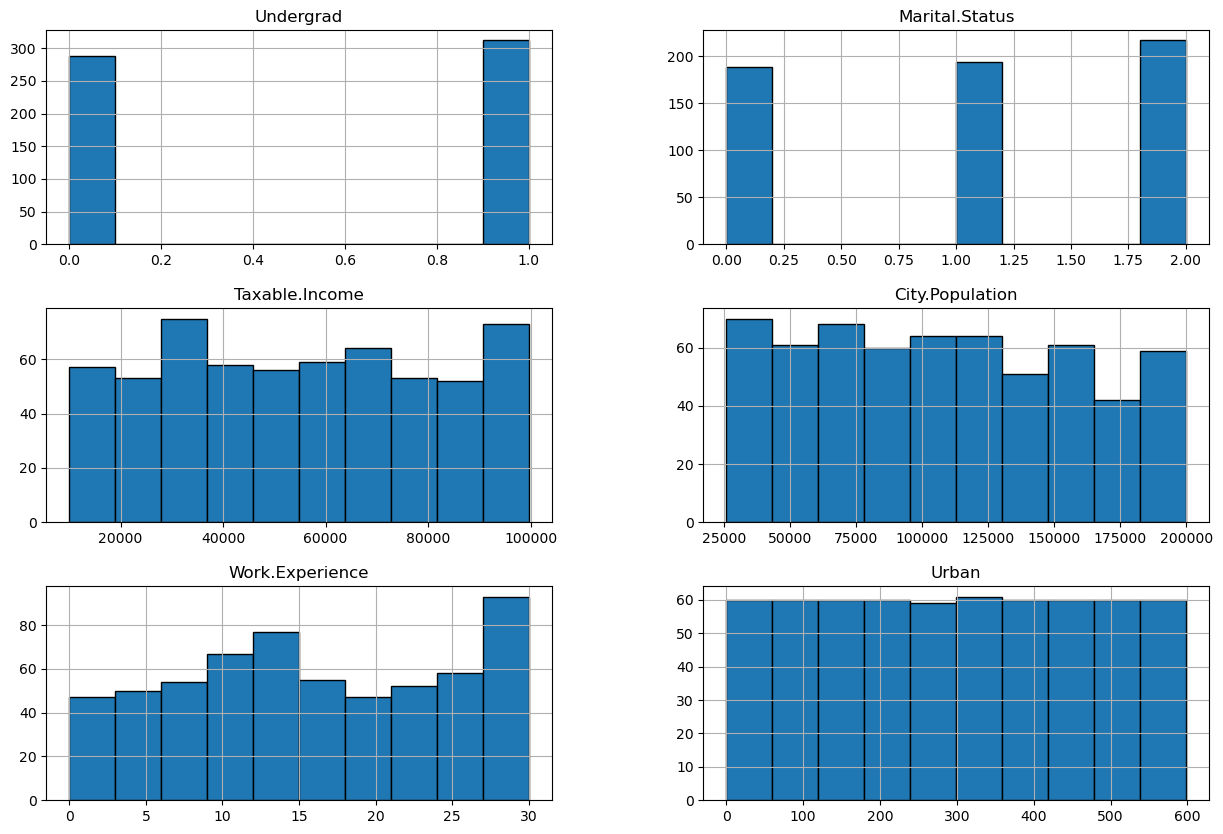

In [13]:
df.hist(edgecolor='black',linewidth=1,figsize=(15,10))

In [14]:
# Assigning independent variable
X = df.drop(['Taxable.Income','TI_cat'], axis=1)
X.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,387
1,1,0,134075,18,163
2,0,1,160205,30,186
3,1,2,193264,15,272
4,0,1,27533,28,468


In [15]:
# Assigning target variable
Y = df['TI_cat']
Y.head()

0    Good
1    Good
2    Good
3    Good
4    Good
Name: TI_cat, dtype: object

In [16]:
Y.value_counts()

Good     476
Risky    124
Name: TI_cat, dtype: int64

In [17]:
Y.unique()

array(['Good', 'Risky'], dtype=object)

# Spliting and training the data

In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=42)

In [19]:
X_train.shape, X_test.shape, Y_train.shape,  Y_test.shape

((480, 5), (120, 5), (480,), (120,))

# Model Building using Random forest

In [20]:
model = RandomForestClassifier(n_estimators=100,criterion='entropy',max_features=3)
model.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_features=3)

In [21]:
pred = model.predict(X_test)

In [22]:
print(np.mean(Y_test==pred))

1.0


In [23]:
model.score(X_train,Y_train)

1.0

In [24]:
model.score(X_test,Y_test)

1.0

 # Applying K-Fold cross Validation

In [25]:
kfold=KFold(n_splits=10)
results=cross_val_score(model,X,Y,cv=kfold)
print(results.mean())

0.9983333333333334


# USING BAGGING TECHNIQUE

In [26]:
modelb = BaggingClassifier(base_estimator=model)
results = cross_val_score(modelb,X,Y,cv=kfold)
print(results.mean())

0.9966666666666667


# USING ADABOOST TECHNIQUE

In [27]:
modela = AdaBoostClassifier(base_estimator=model)
results = cross_val_score(modela,X,Y,cv=kfold)
print(results.mean())

0.9983333333333334


# USING VOTING CLASSIFIER

In [28]:
estimators = []

model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic',model1))

model2 = DecisionTreeClassifier()
estimators.append(('cart',model2))

model3 = SVC()
estimators.append(('svm',model3))

model4 = AdaBoostClassifier(base_estimator=model)
estimators.append(('adaboost',model4))

model5 = BaggingClassifier(base_estimator=model)
estimators.append(('bagging',model5))

model6 = RandomForestClassifier(n_estimators=100,criterion='entropy',max_features=3)
estimators.append(('RandomForest',model6))


ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble,X,Y, cv=kfold)
print(results)

[1.         1.         1.         1.         0.98333333 1.
 1.         1.         1.         1.        ]


In [29]:
print(results.mean())

0.9983333333333334
